In [3]:
import numpy as np
import os
# add GridMetric.py to the path
import sys
sys.path.append(r'C:\Users\acostamendoza\Documents\Code\Grid-orientation-project\src')
import GridMetrics
from GridMetrics import GridScorer, circle_mask, get_even_odd_times, GridParameters, create_new_result_dir, load_grid_metrics_from_pickle
import json
import matplotlib.pyplot as plt
import random

from scipy.ndimage import zoom
from scipy.ndimage import gaussian_filter
%load_ext autoreload
%autoreload 2

In [4]:
fig_directory = r'C:\Users\acostamendoza\Box\grid-cell-project\sup-three-axes'

In [7]:
rat = 'r1'
mod = '2'

G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists


# Trying with 50 bins

In [5]:
good_cells= np.where(np.array(G.orientation) != None)[0]

def get_cell_axis_dict(upsample = False):
    
    cell_axis_dict = {}
    
    for cell in good_cells:
        
        if G.grid_scores[cell] > 0.85:
            
            cell_axis_dict[cell] = {}
            cell_sac = G.Scorer.calculate_sac(cell)
            
            if upsample:
                cell_sac = zoom(cell_sac, (2*50-1)/(2*50-1))
                cell_sac = gaussian_filter(cell_sac, 0.5)
            
            r_three, th_three = G.get_coordinates_first_3_peaks(cell_sac)
            r_three = 2 * 100 * r_three
            th_three = th_three * 180 / np.pi
            
            cell_axis_dict[cell]['r'] = r_three
            cell_axis_dict[cell]['th'] = th_three
            
    return cell_axis_dict

# pull all the r_three[0] from cell_axis_dict
def get_axis_params(cell_axis_dict, axis = 0):
    
    r = []
    th = []
    
    for cell in cell_axis_dict:
        
        r.append(cell_axis_dict[cell]['r'][axis])
        th.append(cell_axis_dict[cell]['th'][axis])
        
    return np.array(r), np.array(th)

In [60]:
G.mask_radius = 0.26
cell_axis_100bins = get_cell_axis_dict(upsample = True)
# cell_axis_100bins = get_cell_axis_dict(bins = 100)

In [201]:
G.mask_radius = 0.5

C:\Users\acostamendoza\projects\Grid-orientation-project\src\GridMetrics.py:226: RuntimeWarning: invalid value encountered in divide
  x_coef = np.divide(covar, np.multiply(std_seq1, std_seq2))


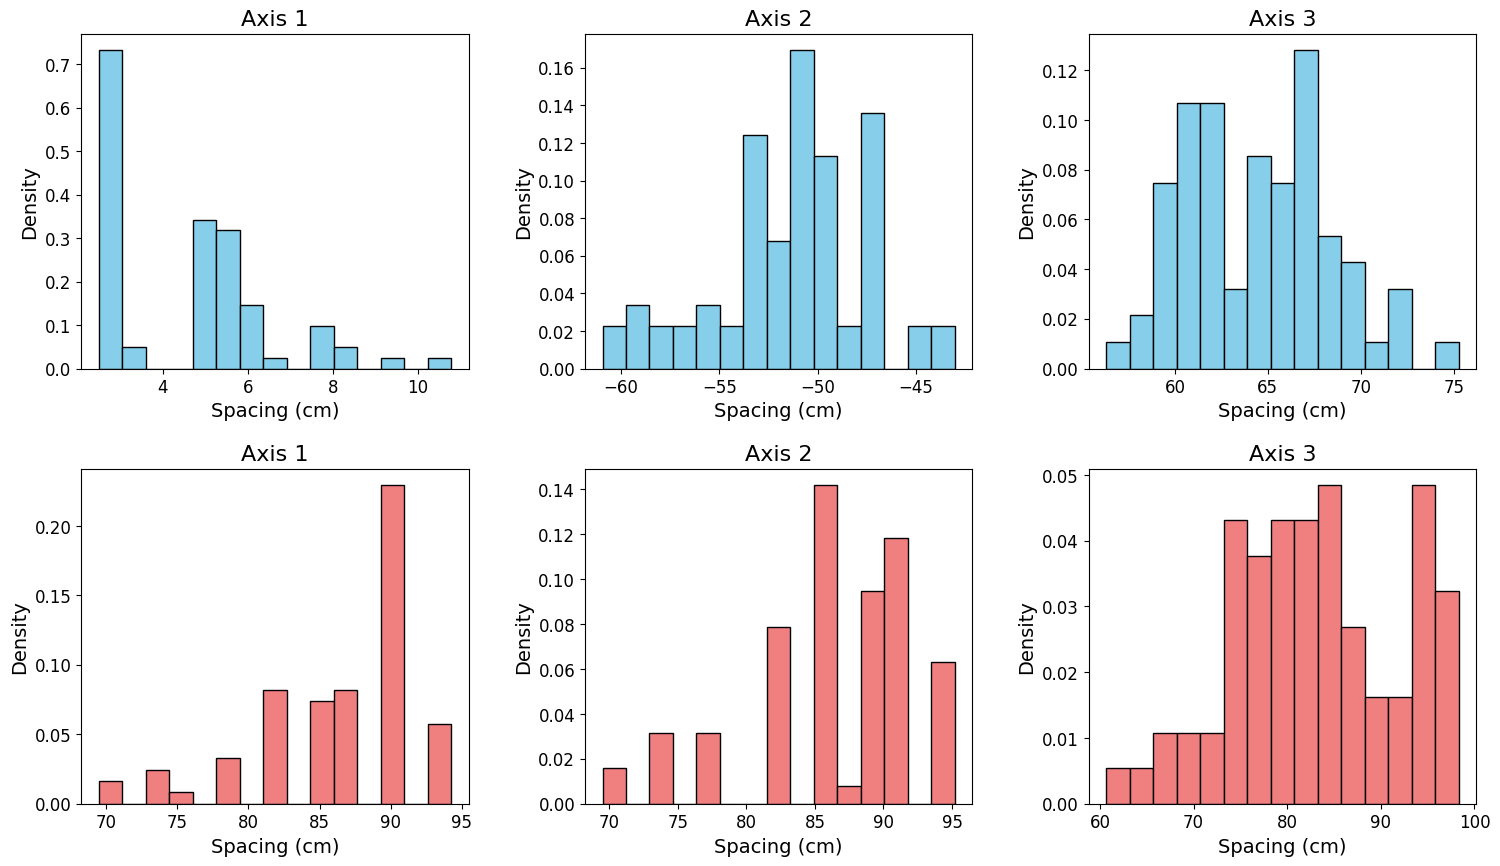

In [6]:
# make a figure with 2 rows of 4 subplots each
from scipy.stats import circmean

cell_axis_50bins = get_cell_axis_dict(upsample = False)

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

# have more space between rows
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

# make first subplot
th1_50 = get_axis_params(cell_axis_50bins, axis = 0)[1]
th2_50 = get_axis_params(cell_axis_50bins, axis = 1)[1]
th3_50 = get_axis_params(cell_axis_50bins, axis = 2)[1]

r1_50 = get_axis_params(cell_axis_50bins, axis = 0)[0]
r2_50 = get_axis_params(cell_axis_50bins, axis = 1)[0]
r3_50 = get_axis_params(cell_axis_50bins, axis = 2)[0]

axs[0, 0].hist(th1_50, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 0].set_title('Axis 1', fontsize = 16)
axs[0, 0].set(xlabel='Angle (degrees)', ylabel='Density')
axs[0, 1].hist(th2_50, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 1].set_title('Axis 2', fontsize = 16)
axs[0, 1].set(xlabel='Angle (degrees)', ylabel='Density')
axs[0, 2].hist(th3_50, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 2].set_title('Axis 3', fontsize = 16)
axs[0, 2].set(xlabel='Angle (degrees)', ylabel='Density')

# do the same for spacing in the second row
axs[1, 0].hist(r1_50, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 0].set_title('Axis 1', fontsize = 16)
axs[1, 0].set(xlabel='Spacing (cm)', ylabel='Density')
axs[1, 1].hist(r2_50, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 1].set_title('Axis 2', fontsize = 16)
axs[1, 1].set(xlabel='Spacing (cm)', ylabel='Density')
axs[1, 2].hist(r3_50, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 2].set_title('Axis 3', fontsize = 16)
axs[1, 2].set(xlabel='Spacing (cm)', ylabel='Density')

for ax in axs.flat:
    # if ax in first row
    
    # if ax in second row
    ax.set(xlabel='Spacing (cm)', ylabel='Density')
    # set axis tickparams and labels to fontsize 14
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    # and axis title
    ax.yaxis.label.set_size(14)

[67.16634582 64.79887635 65.77225468 64.79887635 64.79887635 64.79887635
 68.19859051 62.10272897 62.35402464 59.53445508 66.37062227 64.65382406
 62.2414594  66.80140949 67.16634582 59.03624347 67.16634582 69.14554196
 65.77225468 59.53445508 62.10272897 64.65382406 61.18920626 63.43494882
 71.56505118 66.03751103 66.03751103 59.53445508 63.43494882 63.43494882
 59.53445508 75.25643716 60.9453959  70.70995378 62.35402464 60.9453959
 61.18920626 59.03624347 64.65382406 60.9453959  62.10272897 67.16634582
 67.16634582 61.92751306 63.43494882 61.18920626 66.37062227 59.93141718
 60.64224646 72.47443163 61.18920626 66.80140949 67.16634582 67.16634582
 69.77514057 61.92751306 72.47443163 56.30993247 66.80140949 70.34617594
 68.19859051 69.77514057 57.99461679 68.19859051 68.74949449 67.16634582
 62.10272897 66.03751103 60.9453959  57.99461679 64.79887635 67.16634582
 60.64224646 68.19859051]
[-50.52754015 -46.97493401 -53.13010235 -47.1210964  -43.02506599
 -45.         -50.19442891 -49.39

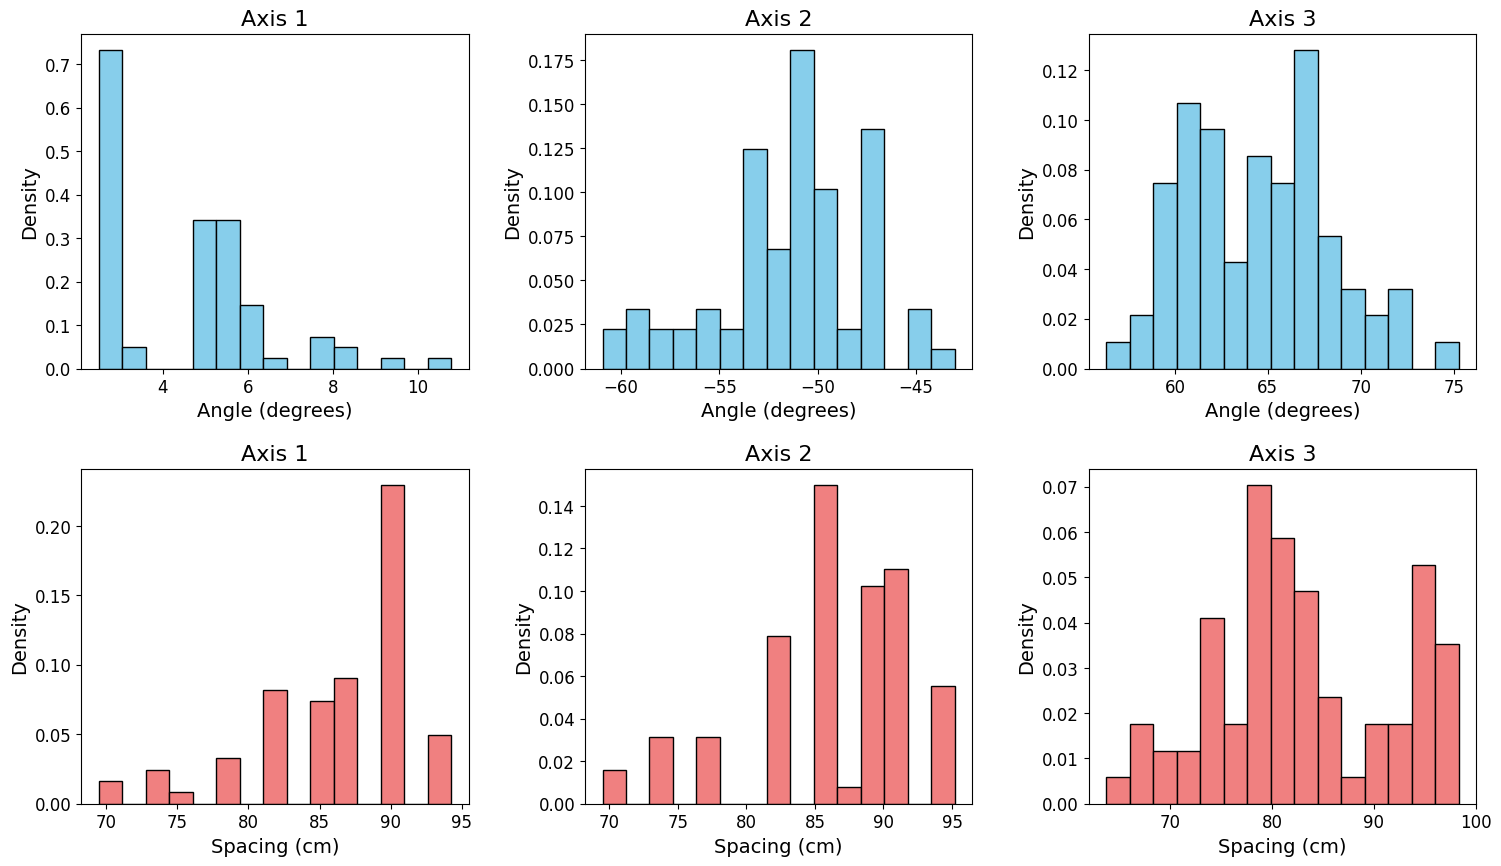

In [62]:
# make a figure with 2 rows of 4 subplots each
from scipy.stats import circmean

fig, axs = plt.subplots(2, 3, figsize = (18, 10))

# have more space between rows
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

# make first subplot
th1_100 = get_axis_params(cell_axis_100bins, axis = 0)[1]
th2_100 = get_axis_params(cell_axis_100bins, axis = 1)[1]
th3_100 = get_axis_params(cell_axis_100bins, axis = 2)[1]

r1_100 = get_axis_params(cell_axis_100bins, axis = 0)[0]
r2_100 = get_axis_params(cell_axis_100bins, axis = 1)[0]
r3_100 = get_axis_params(cell_axis_100bins, axis = 2)[0]

print(th3_100)
print(th2_100)
print(good_cells)

axs[0, 0].hist(th1_100, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 0].set_title('Axis 1', fontsize = 16)
axs[0, 0].set(xlabel='Angle (degrees)', ylabel='Density')
axs[0, 1].hist(th2_100, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 1].set_title('Axis 2', fontsize = 16)
axs[0, 1].set(xlabel='Angle (degrees)', ylabel='Density')
axs[0, 2].hist(th3_100, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 2].set_title('Axis 3', fontsize = 16)
axs[0, 2].set(xlabel='Angle (degrees)', ylabel='Density')

# do the same for spacing in the second row
axs[1, 0].hist(r1_100, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 0].set_title('Axis 1', fontsize = 16)
axs[1, 0].set(xlabel='Spacing (cm)', ylabel='Density')
axs[1, 1].hist(r2_100, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 1].set_title('Axis 2', fontsize = 16)
axs[1, 1].set(xlabel='Spacing (cm)', ylabel='Density')
axs[1, 2].hist(r3_100, bins = 15, color='lightcoral', edgecolor='black', density = True)
axs[1, 2].set_title('Axis 3', fontsize = 16)
axs[1, 2].set(xlabel='Spacing (cm)', ylabel='Density')

for ax in axs.flat:
    # if ax in first row
    
    # if ax in second row
    # ax.set(xlabel='Spacing (cm)', ylabel='Density')
    # set axis tickparams and labels to fontsize 14
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.label.set_size(14)
    # and axis title
    ax.yaxis.label.set_size(14)
    
plt.savefig(fig_directory + '/' + rat + mod + '_axis_distribution_100bins.png', dpi = 1200)
plt.savefig(fig_directory + '/' + rat + mod + '_axis_distribution_100bins.svg', dpi = 1200)

NameError: name 'cell_axis_100bins' is not defined

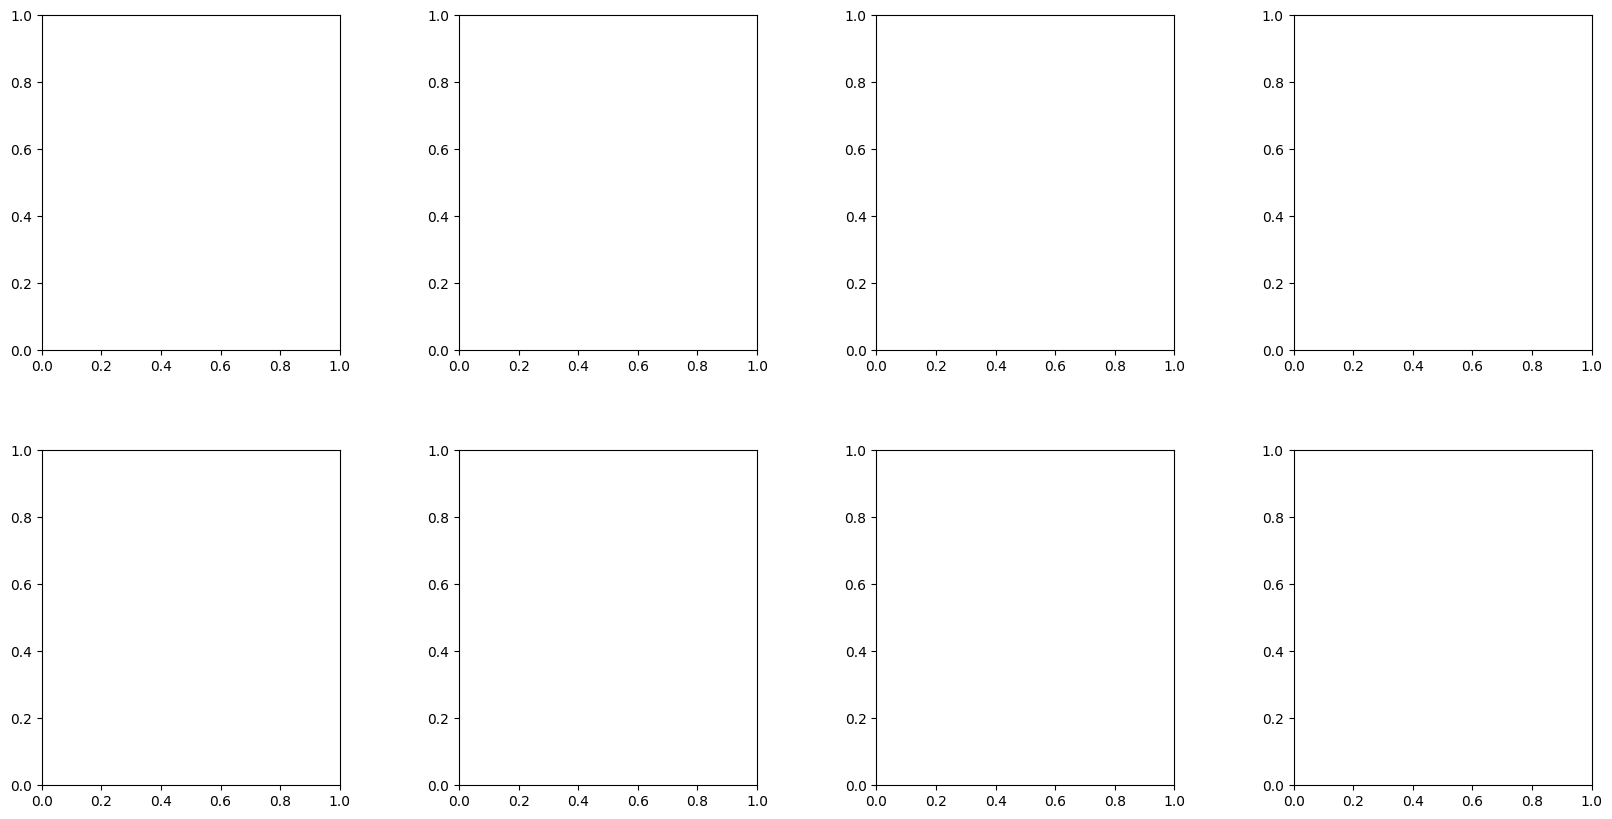

In [15]:
# make a figure with 2 rows of 4 subplots each
from scipy.stats import circmean

fig, axs = plt.subplots(2, 4, figsize = (20, 10))

# have more space between rows
fig.subplots_adjust(hspace = 0.3, wspace = 0.4)

# make first subplot
th1_100 = get_axis_params(cell_axis_50bins, axis = 0)[1]
th2_100 = get_axis_params(cell_axis_50bins, axis = 1)[1]
th3_100 = get_axis_params(cell_axis_50bins, axis = 2)[1]
print(th3_100)
print(th2_100)
print(good_cells)
th_100 = circmean((th1_100, th2_100, th3_100), axis = 0, high = 180, low = -180)

axs[0, 0].hist(th_50, bins = 15, color='lightgray', edgecolor='black', density = True)
axs[0, 0].set_title('Mean of axis, 50 bins')
axs[0, 1].hist(th1_50, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[0, 1].set_title('Axis 1, 50 bins')
axs[0,1].set_xlim(2, 10)
axs[0, 2].hist(th2_50 + 60, bins = 15, color='lightgreen', edgecolor='black', density = True)
axs[0, 2].set_title('Axis 2, 50 bins')
axs[0, 3].hist(th3_50 - 60, bins = 15, color='lightsalmon', edgecolor='black', density = True)
axs[0, 3].set_title('Axis 3, 50 bins')

axs[1, 0].hist(th_100, bins = 15, color='lightgray', edgecolor='black', density = True)
axs[0, 0].set_title('Mean of axis, 100 bins')
axs[1, 1].hist(th1_100, bins = 15, color='skyblue', edgecolor='black', density = True)
axs[1, 1].set_title('Axis 1, 100 bins')
axs[1,1].set_xlim(2, 10)
axs[1, 2].hist(th2_100 + 60, bins = 15, color='lightgreen', edgecolor='black', density = True)
axs[1, 2].set_title('Axis 2, 100 bins')
axs[1, 3].hist(th3_100 - 60, bins = 15, color='lightsalmon', edgecolor='black', density = True)
axs[1, 3].set_title('Axis 3, 100 bins')

for ax in axs.flat:
    ax.set(xlabel='Angle from canonical axes (degrees)', ylabel='Density')

Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q1 already exists
 Cell 95/97 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\q2 already exists
 Cell 64/66 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r11 already exists
 Cell 154/166 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r12 already exists
 Cell 167/168 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r13 already exists
 Cell 148/149 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\s1 already exists
 Cell 136/140 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r21 already exists
 Cell 188/189 Trial 100/100Directory C:\Users\acostamendoza\projects\Grid-orientation-project\results\r22 already exists
 Cell 171/172 Trial 100/100

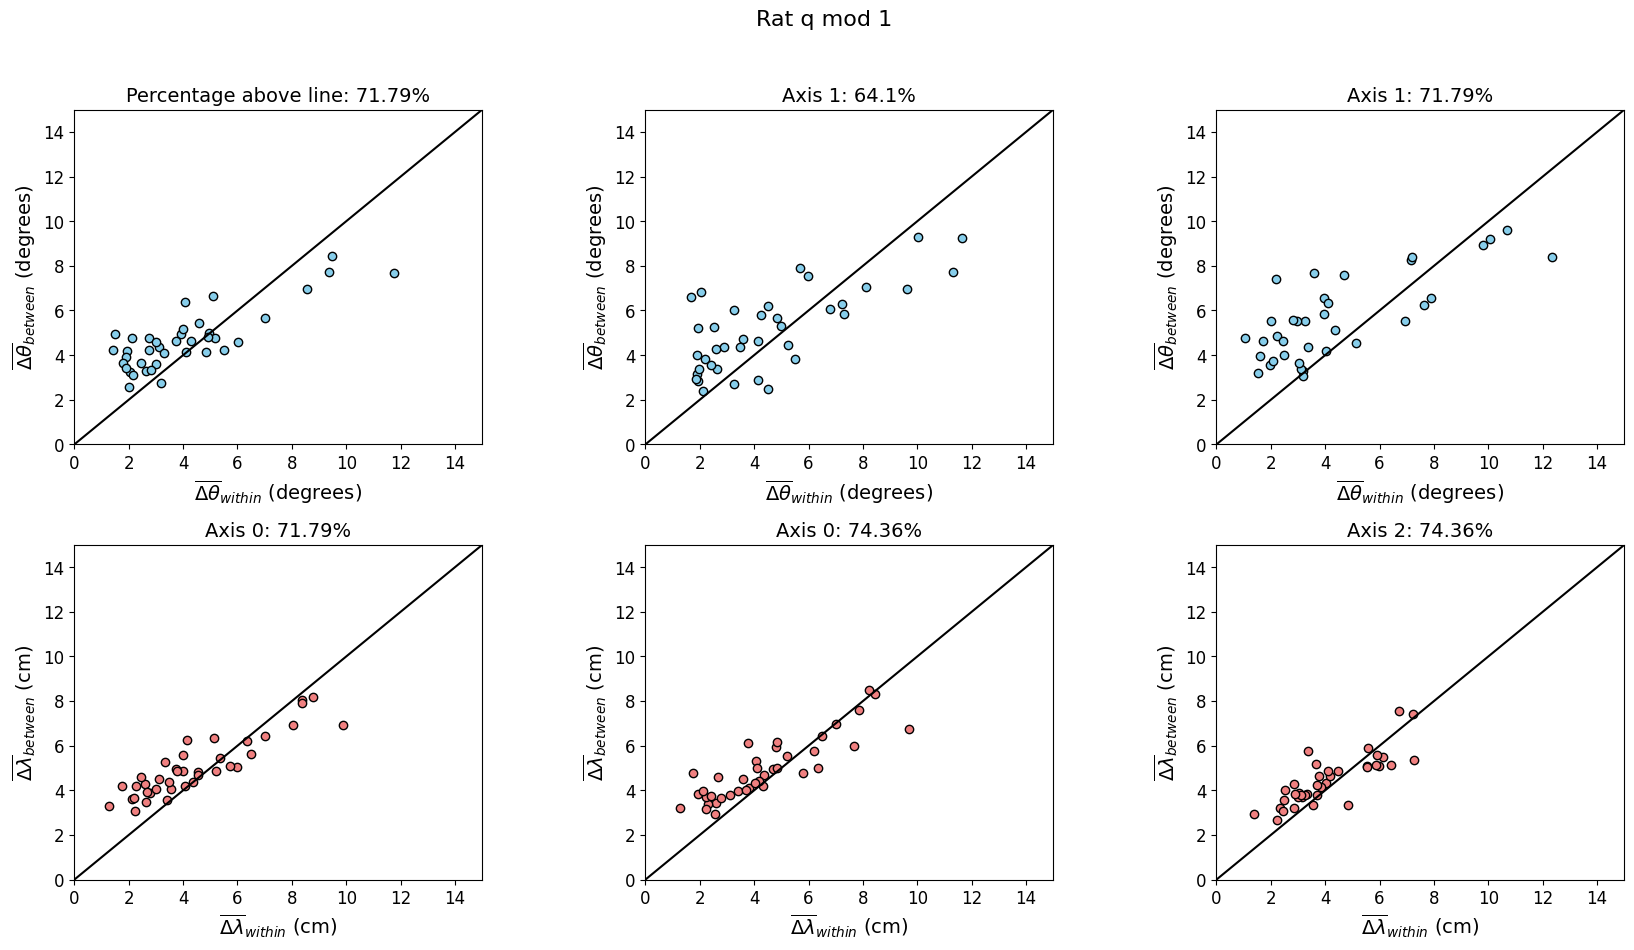

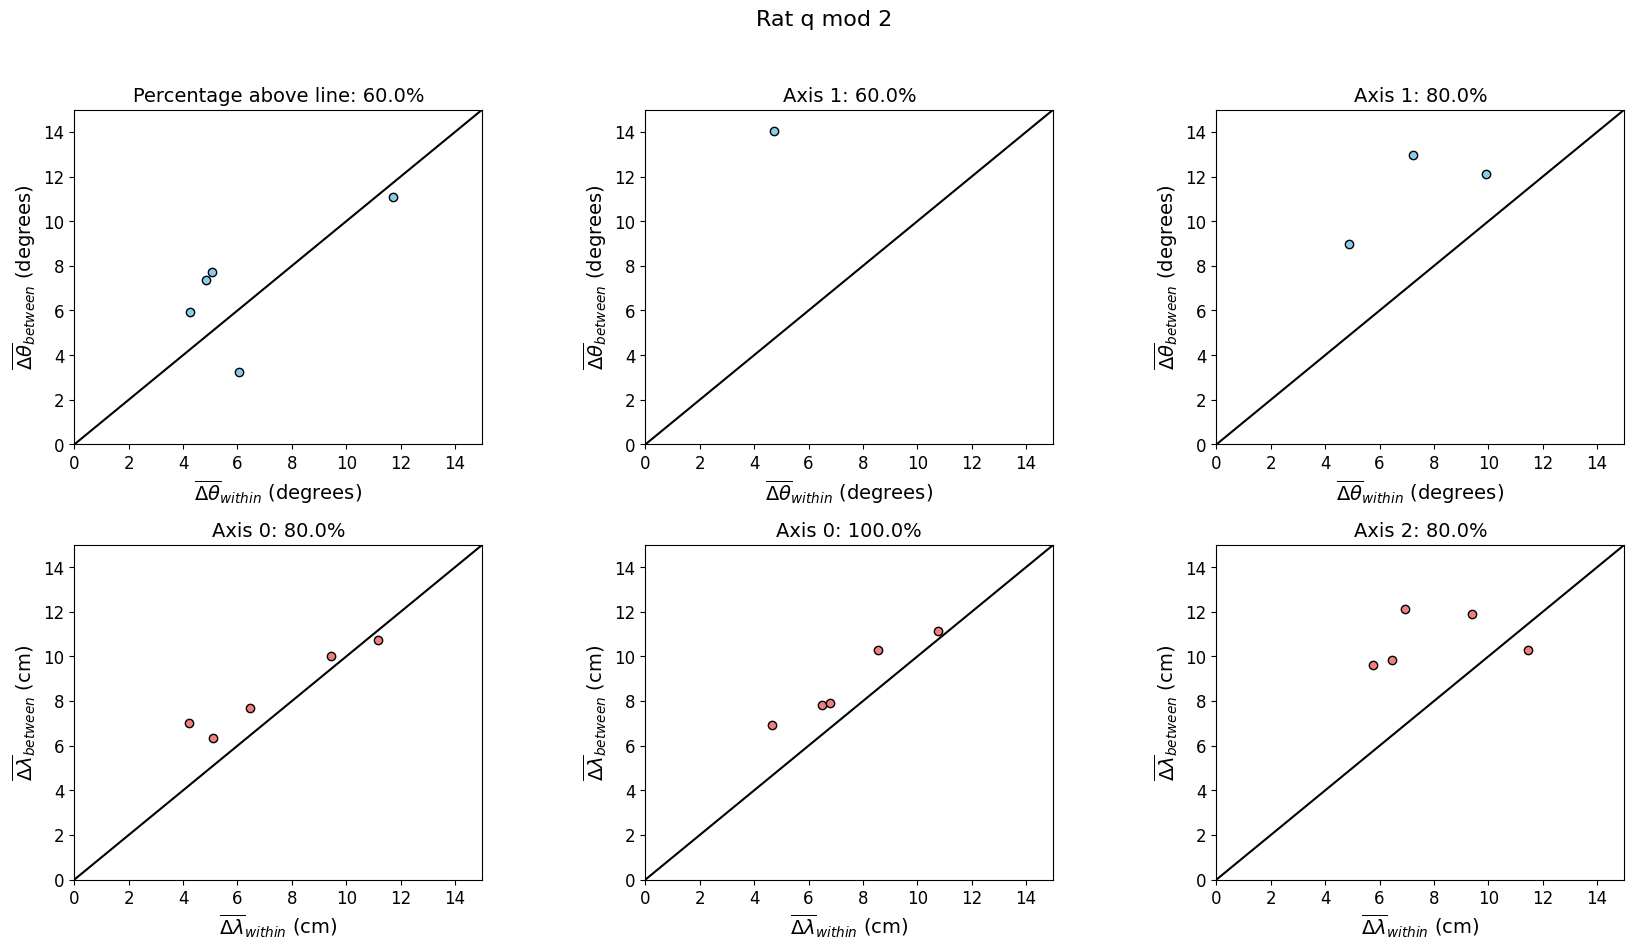

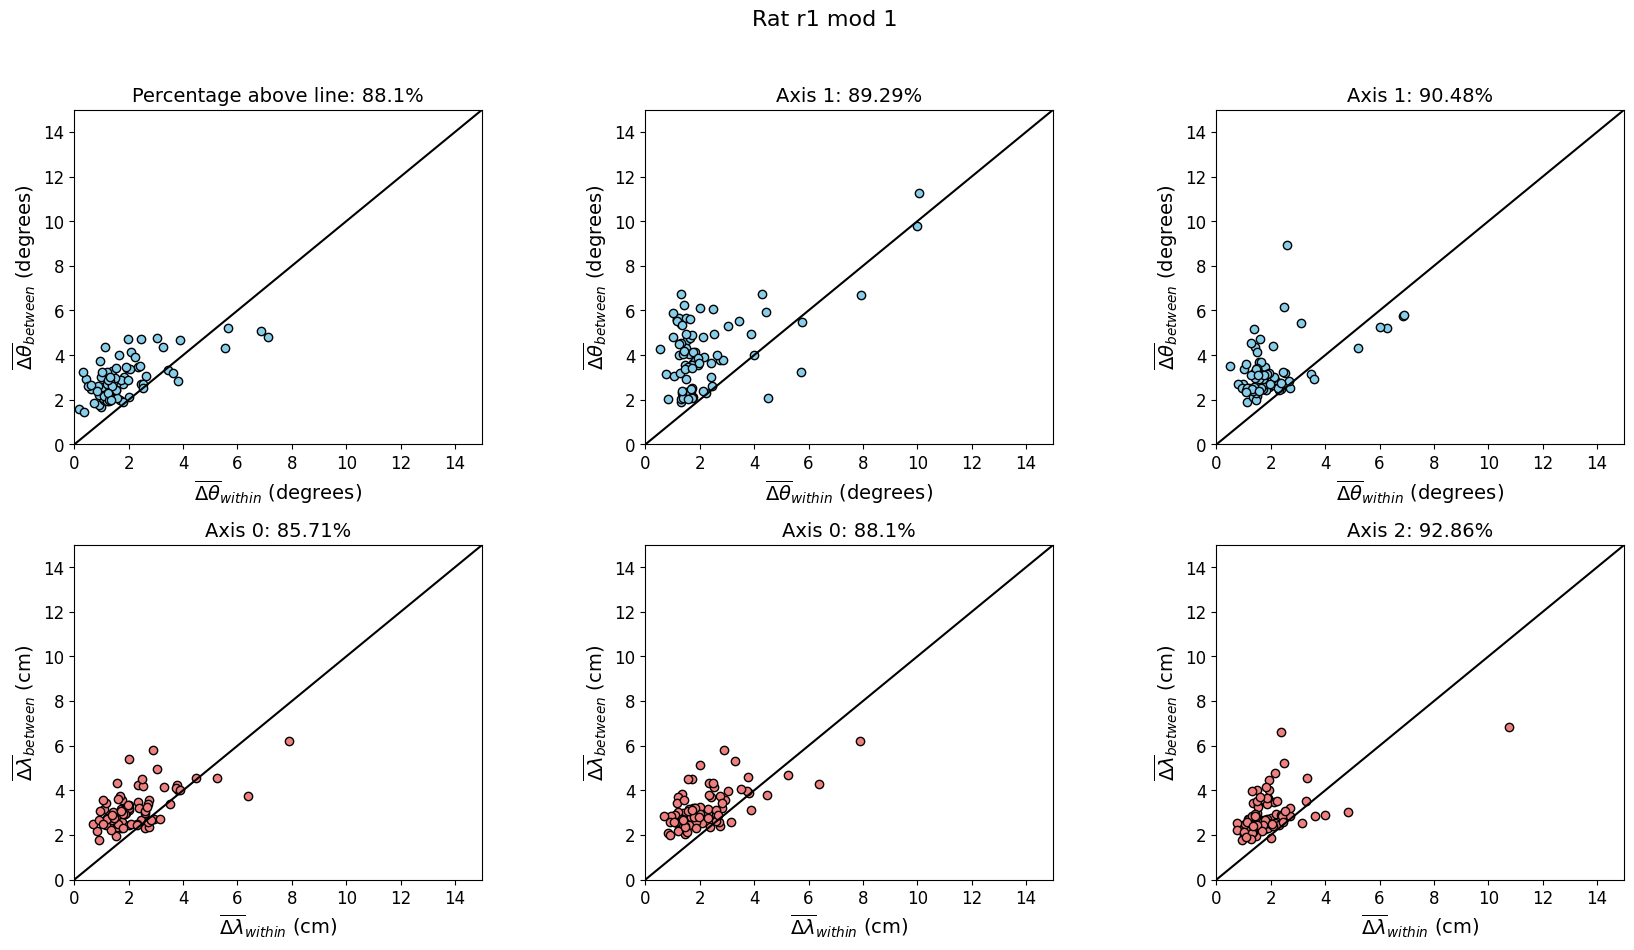

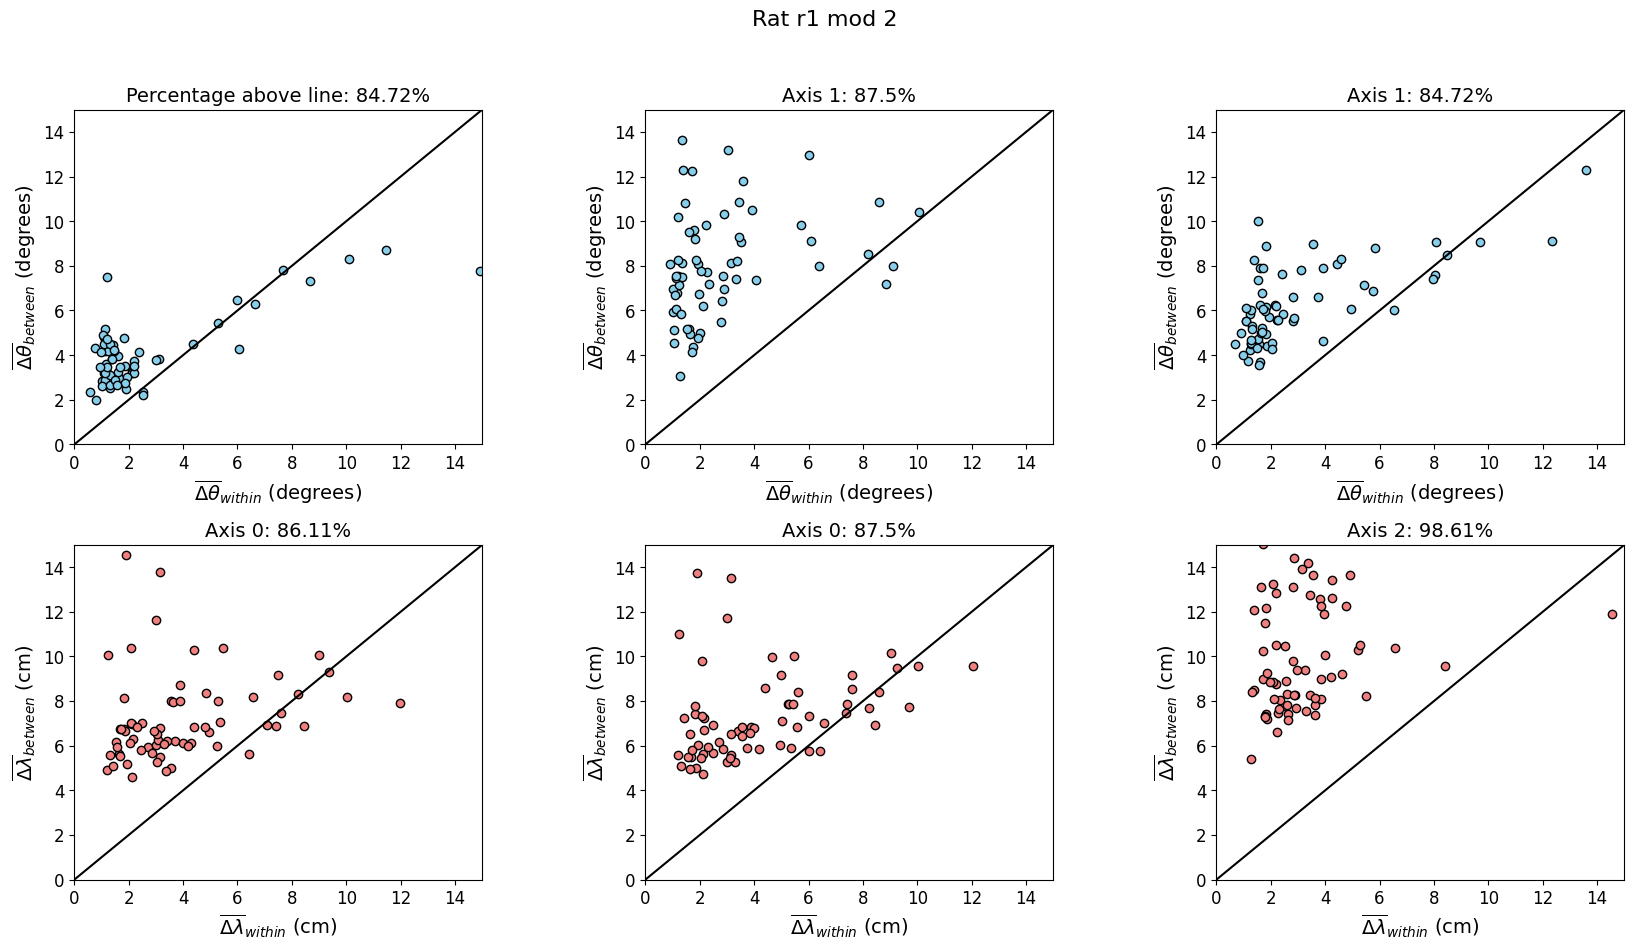

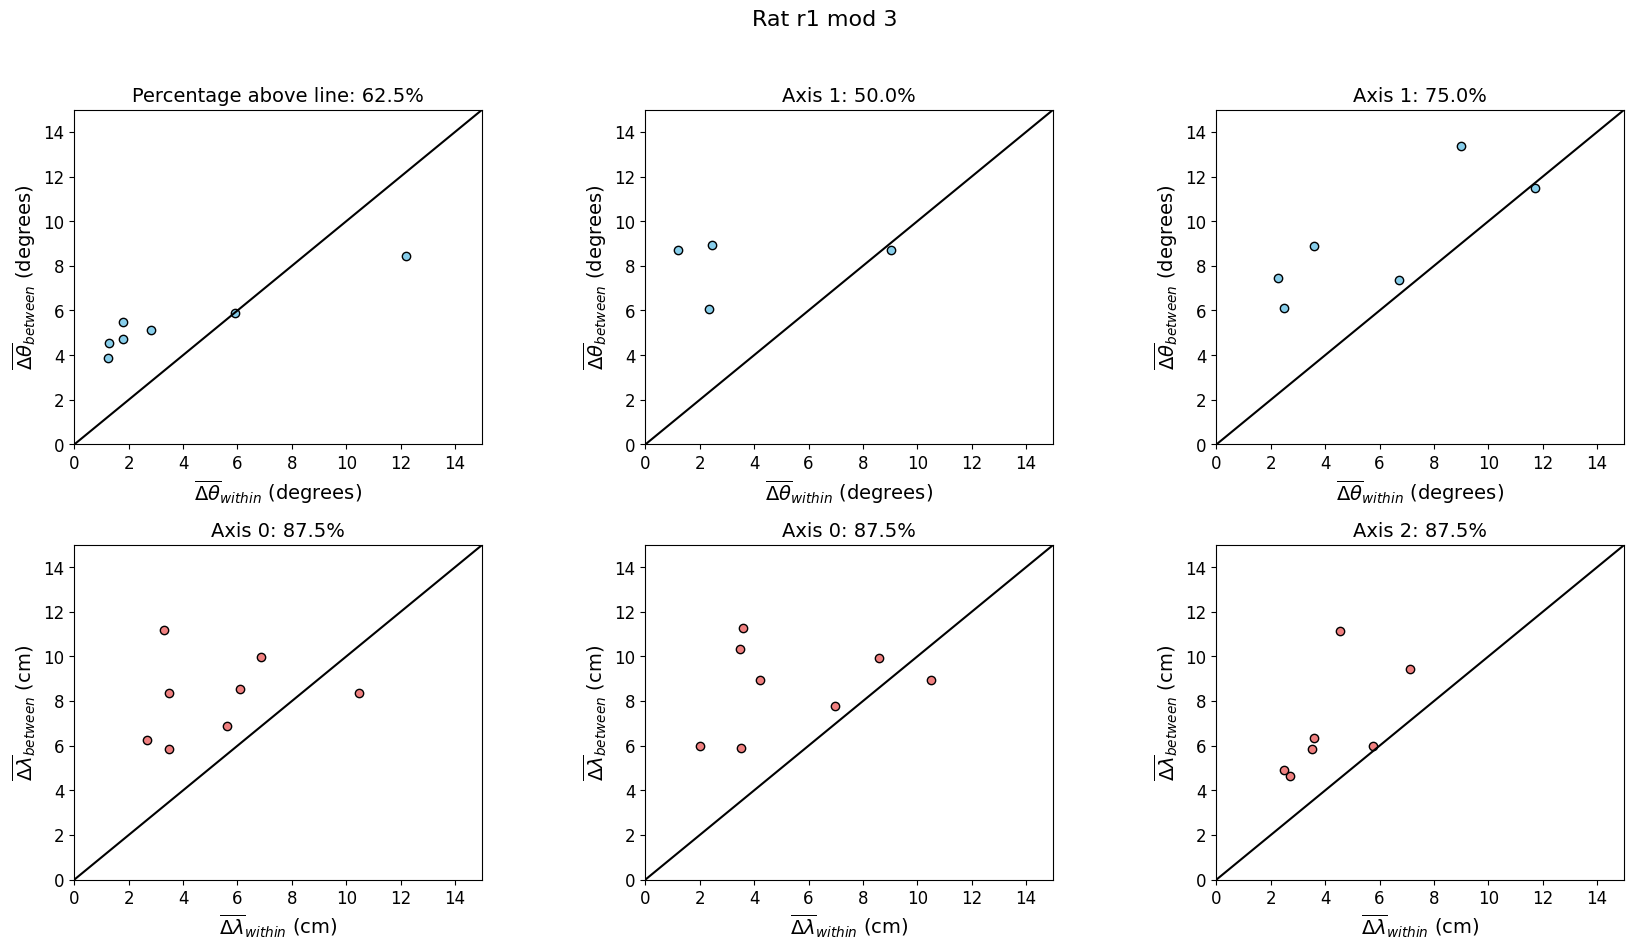

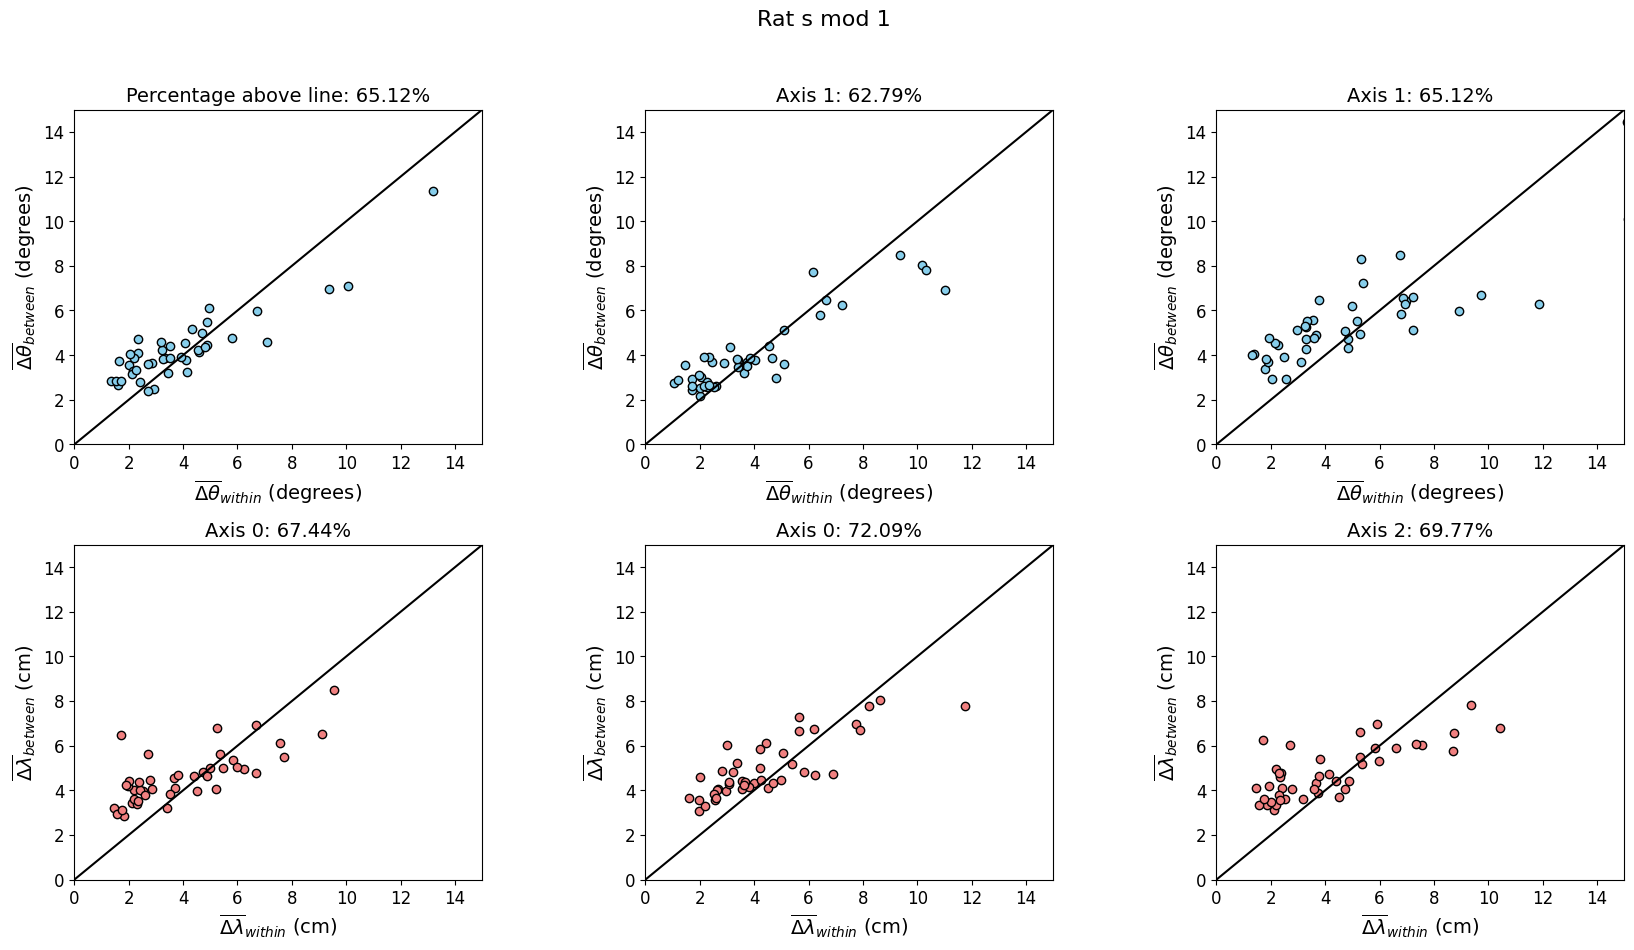

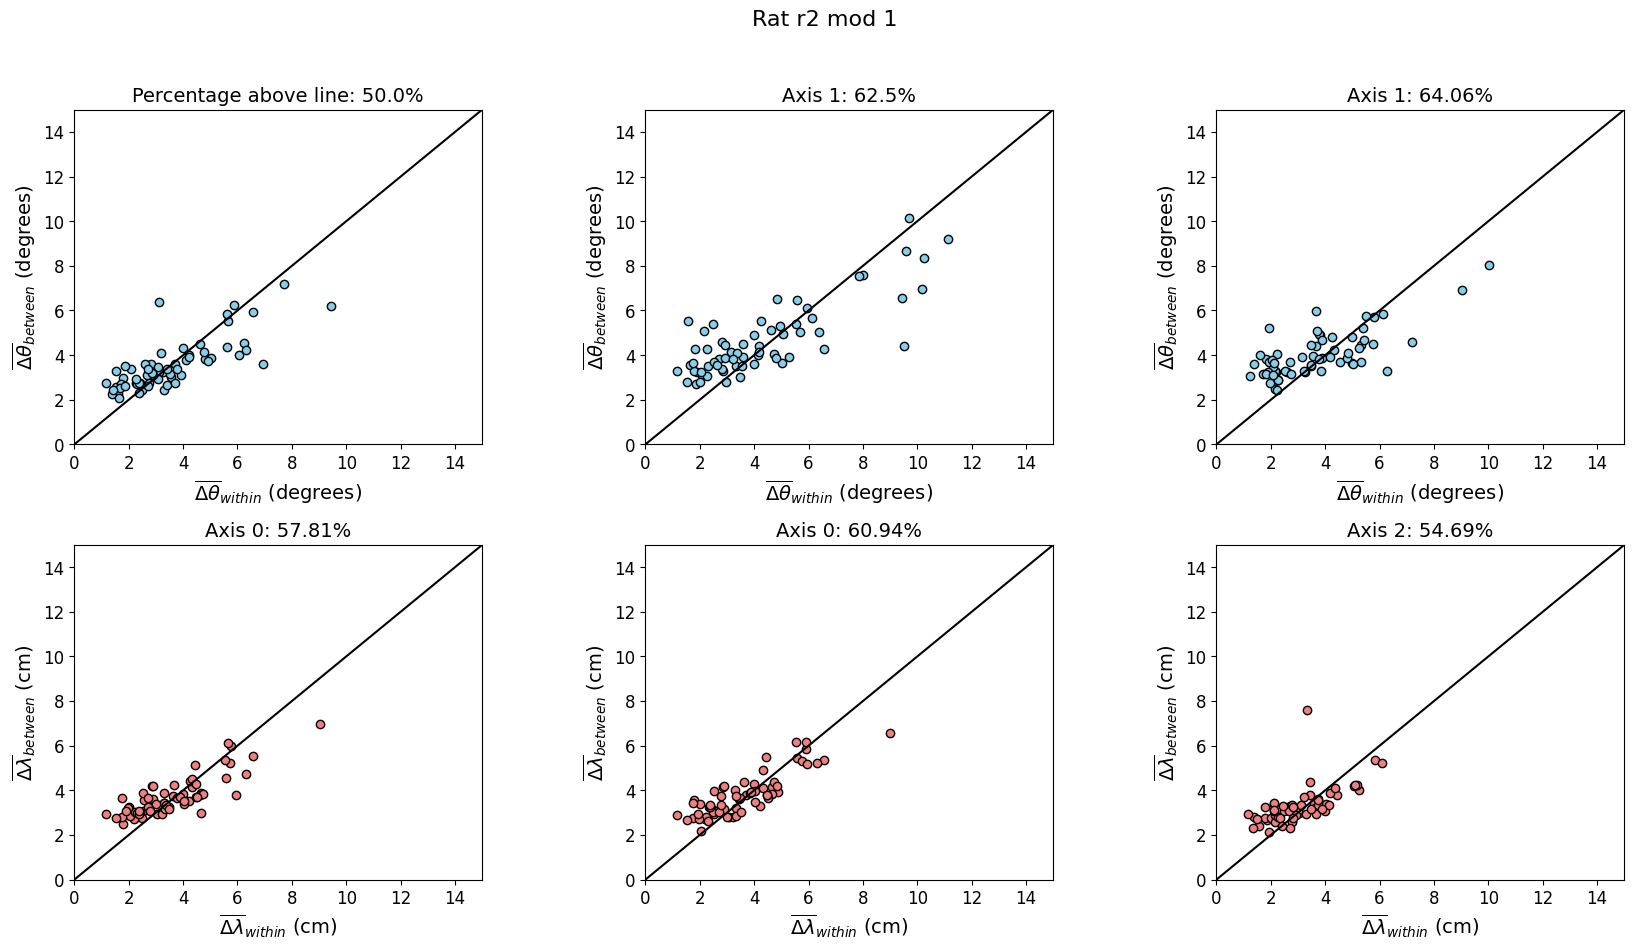

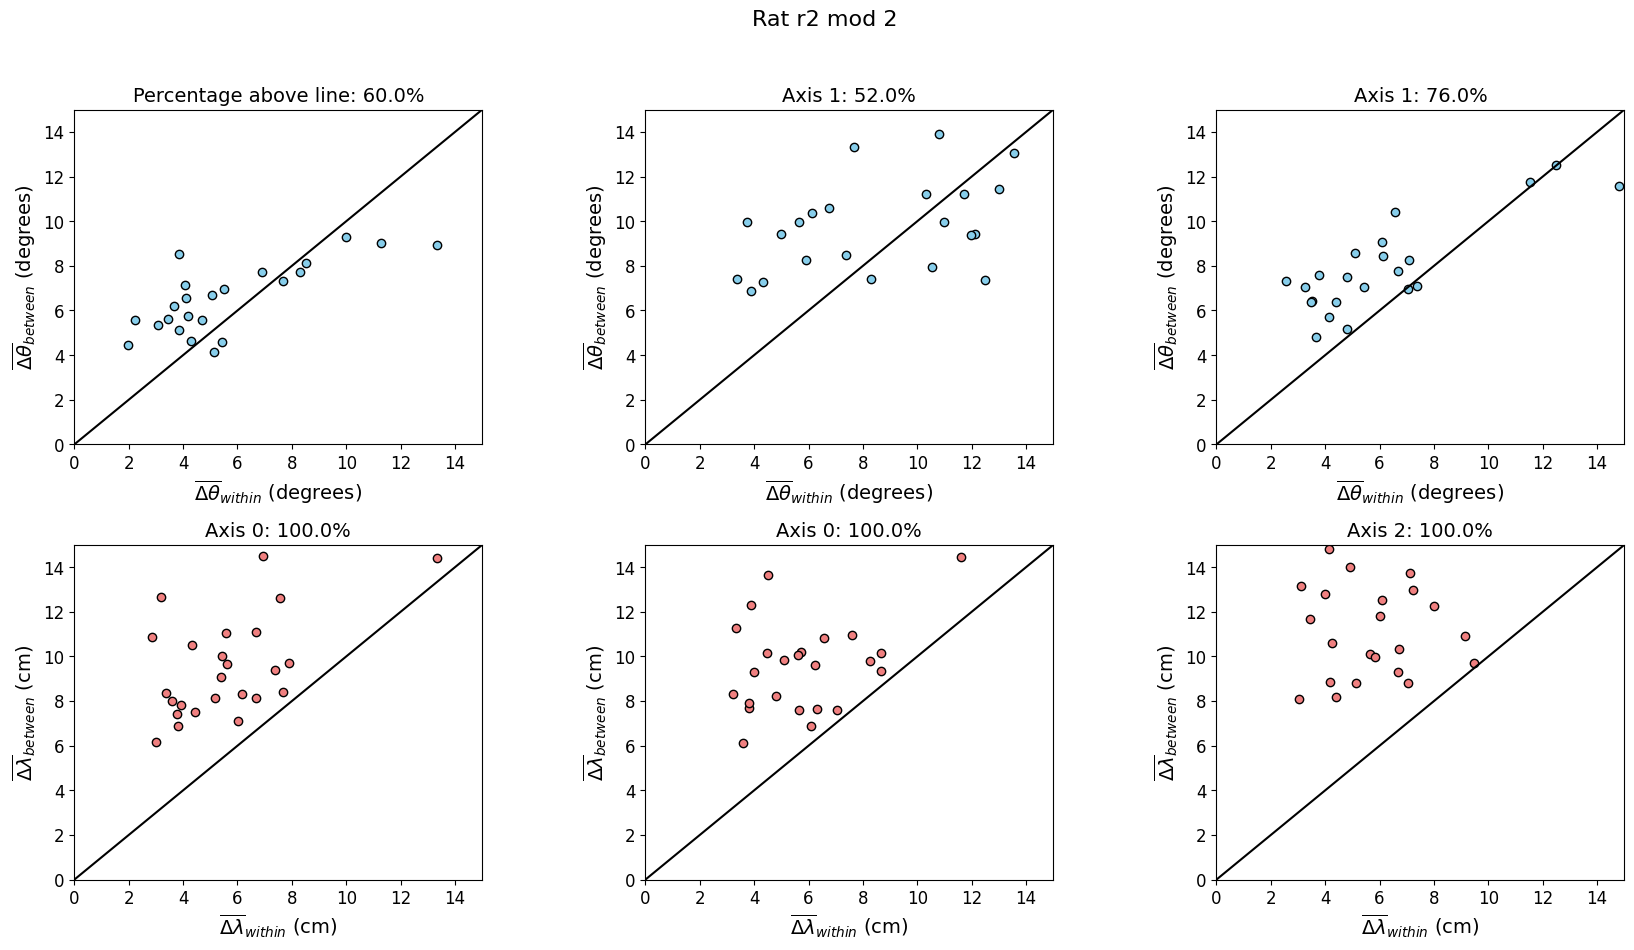

In [64]:
# load r12_valid_times_30s-no-rejection
rats = ['q', 'q', 'r1', 'r1', 'r1', 's', 'r2', 'r2']
mods = ['1', '2', '1', '2', '3', '1', '1', '2']

for rat, mod in zip(rats, mods):
    
    G, general_results_working_directory, session_results_directory = load_grid_metrics_from_pickle(rat, mod)

    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_odds-even-30s-no-rejection.json') as f:
        cell_trial_dict = json.load(f)

    # load from the same folder the .npy file valid_times
    valid_times = np.load(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_valid_times-30s-no-rejection.npy', allow_pickle = True)
    axis_metrics = G.compute_session_odd_even_axis_metrics(valid_times, upsample=True)
    
    import pickle
    
    with open(general_results_working_directory + '/' + rat + mod + '/' + rat + mod + '_axis_metrics_30s_100bins.pkl', 'wb') as f:
        pickle.dump(axis_metrics, f)
        
     # Create a figure with two subplots
    fig, axes = plt.subplots(2, 3, figsize = (20, 10))
    
    orientation_lim = 15
    spacing_lim = 15
    
    # have more space between rows
    fig.subplots_adjust(hspace = 0.3, wspace = 0.4)
    
    plt.suptitle('Rat ' +  rat + ' mod ' + mod , fontsize = 16)
    
    ## For the mean
    # delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_differences(cell_trial_dict)
    # orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
    # spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)
    ## Axis 0
    
    delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 0)
    orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
    spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)
    
    # plot scatter plot of orientation
    axes[0, 0].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
    axes[0, 0].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
    axes[0, 0].set_xlim(0, orientation_lim)
    axes[0, 0].set_ylim(0, orientation_lim)
    # plot a diagonal line
    axes[0, 0].plot([0, orientation_lim], [0, orientation_lim], color='black')
    axes[0, 0].set_title('Percentage above line: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
    axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
    axes[0, 0].xaxis.label.set_size(14)
    axes[0, 0].yaxis.label.set_size(14)
    
    # plot scatter plot of spacing
    axes[1, 0].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
    axes[1, 0].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
    axes[1, 0].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
    axes[1, 0].set_xlim(0, spacing_lim)
    axes[1, 0].set_ylim(0, spacing_lim)
    # plot a diagonal line
    axes[1, 0].plot([0, spacing_lim], [0, spacing_lim], color='black')
    axes[1, 0].set_title('Axis 0: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
    axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
    axes[1, 0].xaxis.label.set_size(14)
    axes[1, 0].yaxis.label.set_size(14)
    
    ## For axis 1
    delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 1)
    orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
    spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)
    
    # plot scatter plot of orientation
    axes[0, 1].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
    axes[0, 1].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
    axes[0, 1].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
    axes[0, 1].set_xlim(0, orientation_lim)
    axes[0, 1].set_ylim(0, orientation_lim)
    # plot a diagonal line
    axes[0, 1].plot([0, orientation_lim], [0, orientation_lim], color='black')
    axes[0, 1].set_title('Axis 1: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
    axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
    axes[0, 1].xaxis.label.set_size(14)
    axes[0, 1].yaxis.label.set_size(14)
    
    # plot scatter plot of spacing
    axes[1, 1].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
    axes[1, 1].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
    axes[1, 1].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
    axes[1, 1].set_xlim(0, spacing_lim)
    axes[1, 1].set_ylim(0, spacing_lim)
    # plot a diagonal line
    axes[1, 1].plot([0, spacing_lim], [0, spacing_lim], color='black')
    axes[1, 1].set_title('Axis 0: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
    axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
    axes[1, 1].xaxis.label.set_size(14)
    axes[1, 1].yaxis.label.set_size(14)
    
    ## For axis 2
    delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 2)
    orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
    spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)
    
    # plot scatter plot of orientation
    axes[0, 2].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
    axes[0, 2].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
    axes[0, 2].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
    axes[0, 2].set_xlim(0, orientation_lim)
    axes[0, 2].set_ylim(0, orientation_lim)
    # plot a diagonal line
    axes[0, 2].plot([0, orientation_lim], [0, orientation_lim], color='black')
    axes[0, 2].set_title('Axis 1: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
    axes[0, 2].tick_params(axis='both', which='major', labelsize=12)
    axes[0, 2].xaxis.label.set_size(14)
    axes[0, 2].yaxis.label.set_size(14)
    
    # plot scatter plot of spacing
    axes[1, 2].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
    axes[1, 2].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
    axes[1, 2].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
    axes[1, 2].set_xlim(0, spacing_lim)
    axes[1, 2].set_ylim(0, spacing_lim)
    # plot a diagonal line
    axes[1, 2].plot([0, spacing_lim], [0, spacing_lim], color='black')
    axes[1, 2].set_title('Axis 2: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
    axes[1, 2].tick_params(axis='both', which='major', labelsize=12)
    axes[1, 2].xaxis.label.set_size(14)
    axes[1, 2].yaxis.label.set_size(14)
    
    plt.savefig(fig_directory + '/' + rat + mod + 'scatter_plot_differences_100bins.png', dpi = 1200)
    plt.savefig(fig_directory +  '/' + rat + mod + 'scatter_plot_differences_100bins.svg', dpi = 1200)

In [35]:
def get_accepted_cells(cell_trial_dict):
        
    accepted = []
    
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['score_odd'] is None:
                none_trials += 1
            elif cell_trial_dict[cell][trial]['score_even'] is None:
                none_trials += 1
                
        if none_trials <= 1:
            accepted.append(cell)
            
    return accepted

In [36]:
def get_axis_odds_even_distribution(cell_trial_dict, axis = 0):
    
    accepted = get_accepted_cells(cell_trial_dict)

    delta_orientation_single_cell = []
    delta_orientation_two_cells = []
    delta_spacing_single_cell = []
    delta_spacing_two_cells = []
    
    for cell in accepted:
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['score_odd'] is not None) and (cell_trial_dict[cell][trial]['score_even'] is not None):
                
                delta_orientation_single_cell.append(cell_trial_dict[cell][trial]['th_even'][axis] - cell_trial_dict[cell][trial]['th_odd'][axis])
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['r_odd'][axis] is None) or (cell_trial_dict[second_cell][trial]['r_even'][axis] is None):
                    second_cell = random.choice(list(accepted))
                
                delta_orientation_two_cells.append(cell_trial_dict[cell][trial]['th_even'][axis] - cell_trial_dict[second_cell][trial]['th_odd'][axis])
                delta_spacing_single_cell.append(cell_trial_dict[cell][trial]['r_even'][axis] - cell_trial_dict[cell][trial]['r_odd'][axis])
                delta_spacing_two_cells.append(cell_trial_dict[cell][trial]['r_even'][axis] - cell_trial_dict[second_cell][trial]['r_odd'][axis])
    
    return delta_orientation_single_cell, delta_orientation_two_cells, delta_spacing_single_cell, delta_spacing_two_cells

In [37]:
def get_odds_even_distribution(cell_trial_dict):
    
    accepted = []
    
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
            elif cell_trial_dict[cell][trial]['spacing_even'] is None:
                none_trials += 1
                
        if none_trials <= 5:
            accepted.append(cell)

    delta_orientation_single_cell = []
    delta_orientation_two_cells = []
    delta_spacing_single_cell = []
    delta_spacing_two_cells = []
    
    for cell in accepted:
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['score_odd'] is not None) and (cell_trial_dict[cell][trial]['score_even'] is not None):
                
                delta_orientation_single_cell.append(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd'])
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['spacing_odd'] is None) or (cell_trial_dict[second_cell][trial]['spacing_even'] is None):
                    second_cell = random.choice(list(accepted))
                
                delta_orientation_two_cells.append(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd'])
                delta_spacing_single_cell.append(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd'])
                delta_spacing_two_cells.append(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd'])
    
    return delta_orientation_single_cell, delta_orientation_two_cells, delta_spacing_single_cell, delta_spacing_two_cells

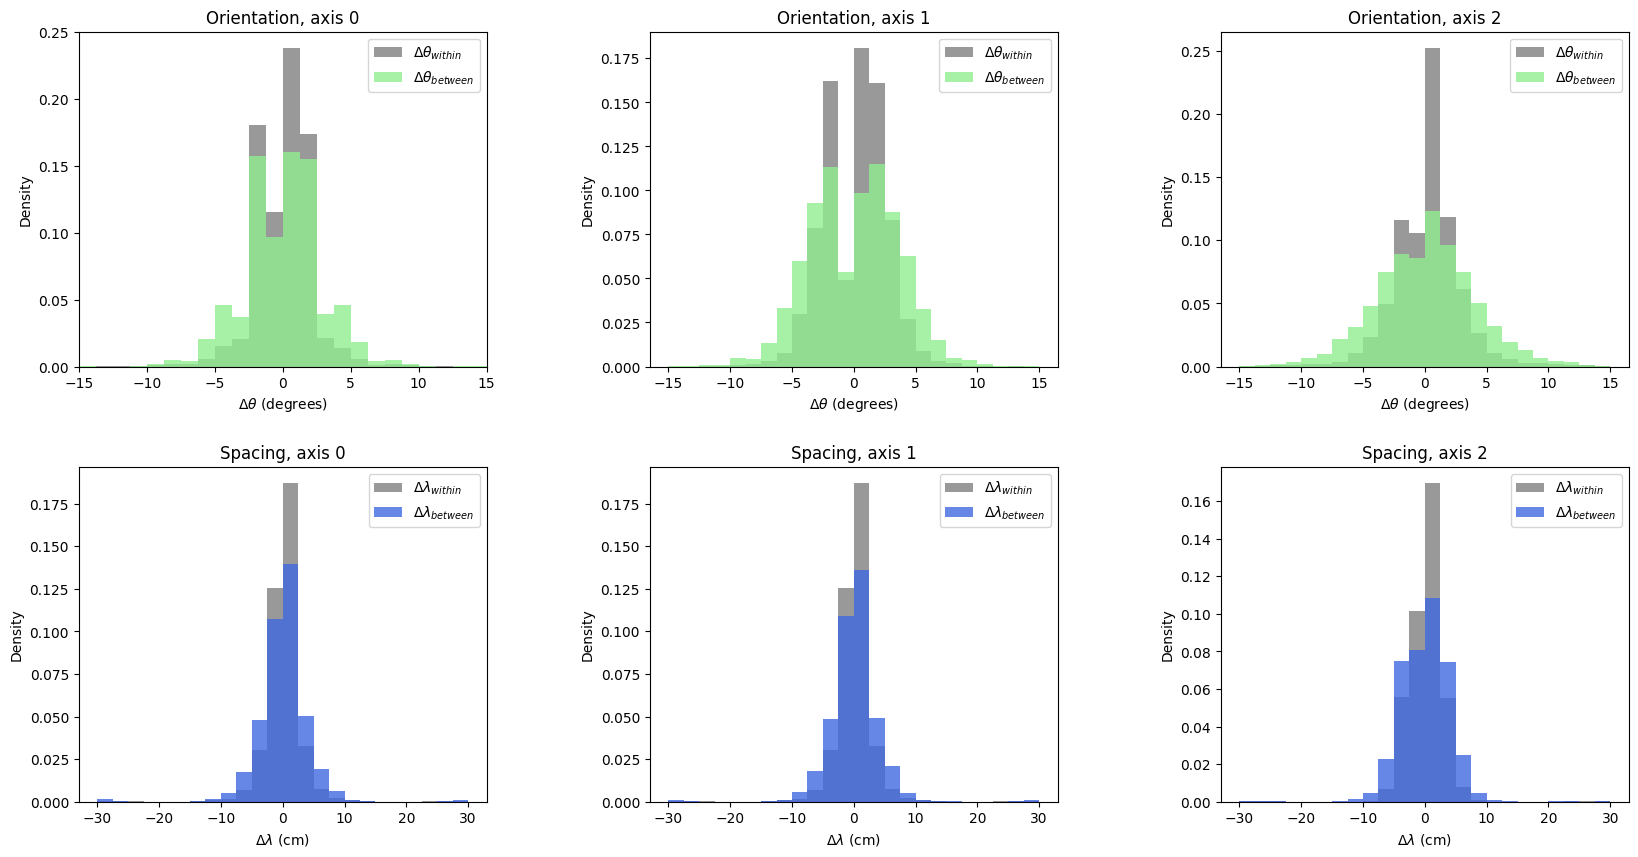

In [56]:
n_bins = 25
bins_orientation = np.linspace(-15, 15, n_bins)
bins_spacing = np.linspace(-30, 30, n_bins)

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

# have more space between rows
fig.subplots_adjust(hspace = 0.3, wspace = 0.4)

# # Orientation, mean of three axes
delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics, axis=0)
axes[0, 0].hist(delta_orientation_within, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{within}$', color = 'gray')
axes[0, 0].hist(delta_orientation_between, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{between}$', color = 'lightgreen')
axes[0, 0].set_xlabel(r'$\Delta\theta$ (degrees)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].set_xlim(bins_orientation[0], bins_orientation[-1])
axes[0, 0].set_title('Orientation, axis 0')

# Spacing, mean of thee axes
axes[1, 0].hist(delta_spacing_within, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{within}$', color = 'gray')
axes[1, 0].hist(delta_spacing_between, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{between}$', color = 'royalblue')
axes[1, 0].set_xlabel(r'$\Delta\lambda$ (cm)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].set_title('Spacing, axis 0')

## Axis 0
delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics, axis = 1)

# Orientation, axis 0
axes[0, 1].hist(delta_orientation_within, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{within}$', color = 'gray')
axes[0, 1].hist(delta_orientation_between, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{between}$', color = 'lightgreen')
axes[0, 1].set_xlabel(r'$\Delta\theta$ (degrees)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 0].set_xlim(bins_orientation[0], bins_orientation[-1])
axes[0, 1].set_title('Orientation, axis 1')

# Spacing, axis 0
axes[1, 1].hist(delta_spacing_within, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{within}$', color = 'gray')
axes[1, 1].hist(delta_spacing_between, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{between}$', color = 'royalblue')
axes[1, 1].set_xlabel(r'$\Delta\lambda$ (cm)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].set_title('Spacing, axis 1')

## Axis 1
delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics, axis = 2)

# Orientation, axis 1
axes[0, 2].hist(delta_orientation_within, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{within}$', color = 'gray')
axes[0, 2].hist(delta_orientation_between, bins=bins_orientation, density = True, alpha = 0.8, label = r'$\Delta\theta_{between}$', color = 'lightgreen')
axes[0, 2].set_xlabel(r'$\Delta\theta$ (degrees)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()
axes[0, 0].set_xlim(bins_orientation[0], bins_orientation[-1])
axes[0, 2].set_title('Orientation, axis 2')

# Spacing, axis 1
axes[1, 2].hist(delta_spacing_within, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{within}$', color = 'gray')
axes[1, 2].hist(delta_spacing_between, bins=bins_spacing, density = True, alpha = 0.8, label = r'$\Delta\lambda_{between}$', color = 'royalblue')
axes[1, 2].set_xlabel(r'$\Delta\lambda$ (cm)')
axes[1, 2].set_ylabel('Density')
axes[1, 2].legend()
axes[1, 2].set_title('Spacing, axis 2')

plt.savefig(fig_directory + '/' + rat + mod + '_axis_distribution_within_between_50bins.png', dpi = 1200)
plt.savefig(fig_directory + '/' + rat + mod + '_axis_distribution_within_between_50bins.svg', dpi = 1200)

In [12]:
# compute Levene test for the three axis
from scipy.stats import levene

# Orientation
delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics_100bins, axis = 0)
statistic, pvalue = levene(delta_orientation_within, delta_orientation_between)
print('Orientation, axis 0')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics_100bins, axis = 1)
statistic, pvalue = levene(delta_orientation_within, delta_orientation_between)
print('Orientation, axis 1')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

delta_orientation_within, delta_orientation_between, delta_spacing_within, delta_spacing_between = get_axis_odds_even_distribution(axis_metrics_100bins, axis = 2)
statistic, pvalue = levene(delta_orientation_within, delta_orientation_between)
print('Orientation, axis 2')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

NameError: name 'axis_metrics_100bins' is not defined

In [41]:
def get_delta_mean_axis_differences(cell_trial_dict, axis = 0):
    
    accepted = get_accepted_cells(cell_trial_dict)
    
    delta_orientation_within_mean = []
    delta_orientation_between_mean = []
    delta_spacing_within_mean = []
    delta_spacing_between_mean = []
    
    for cell in accepted:
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['r_odd'] is not None) and (cell_trial_dict[cell][trial]['r_even'] is not None):
            
                delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['th_even'][axis] - cell_trial_dict[cell][trial]['th_odd'][axis]))
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['r_odd'][axis] is None) or (cell_trial_dict[second_cell][trial]['r_even'][axis] is None):
                    second_cell = random.choice(list(accepted))
                delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['th_even'][axis] - cell_trial_dict[second_cell][trial]['th_odd'][axis]))
                delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['r_even'][axis] - cell_trial_dict[cell][trial]['r_odd'][axis]))
                delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['r_even'][axis] - cell_trial_dict[second_cell][trial]['r_odd'][axis]))
            
        delta_orientation_within_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_between_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_within_mean.append(np.mean(delta_spacing_single_cell))
        delta_spacing_between_mean.append(np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_within_mean = np.array(delta_orientation_within_mean)
    delta_orientation_between_mean = np.array(delta_orientation_between_mean)
    delta_spacing_within_mean = np.array(delta_spacing_within_mean)
    delta_spacing_between_mean = np.array(delta_spacing_between_mean)
    
    return delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean

In [42]:
def get_delta_mean_differences(cell_trial_dict):
    
    accepted = []
    
    for cell in cell_trial_dict:
        none_trials = 0
        for trial in cell_trial_dict[cell]:
            if cell_trial_dict[cell][trial]['spacing_odd'] is None:
                none_trials += 1
                
        if none_trials <= 5:
            accepted.append(cell)
    
    delta_orientation_within_mean = []
    delta_orientation_between_mean = []
    delta_spacing_within_mean = []
    delta_spacing_between_mean = []
    
    for cell in accepted:
        delta_orientation_single_cell = []
        delta_orientation_two_cells = []
        delta_spacing_single_cell = []
        delta_spacing_two_cells = []
        for trial in cell_trial_dict[cell]:
            
            if (cell_trial_dict[cell][trial]['spacing_odd'] is not None) and (cell_trial_dict[cell][trial]['spacing_even'] is not None):
            
                delta_orientation_single_cell.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[cell][trial]['orientation_odd']))
                second_cell = random.choice(list(accepted))
                while (cell_trial_dict[second_cell][trial]['spacing_odd'] is None) or (cell_trial_dict[second_cell][trial]['spacing_even'] is None):
                    second_cell = random.choice(list(accepted))
                delta_orientation_two_cells.append(abs(cell_trial_dict[cell][trial]['orientation_even'] - cell_trial_dict[second_cell][trial]['orientation_odd']))
                delta_spacing_single_cell.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[cell][trial]['spacing_odd']))
                delta_spacing_two_cells.append(abs(cell_trial_dict[cell][trial]['spacing_even'] - cell_trial_dict[second_cell][trial]['spacing_odd']))
            
        delta_orientation_within_mean.append(np.mean(delta_orientation_single_cell))
        delta_orientation_between_mean.append(np.mean(delta_orientation_two_cells))
        delta_spacing_within_mean.append(np.mean(delta_spacing_single_cell))
        delta_spacing_between_mean.append(np.mean(delta_spacing_two_cells))
    
    # convert all four variables to arrays
    delta_orientation_within_mean = np.array(delta_orientation_within_mean)
    delta_orientation_between_mean = np.array(delta_orientation_between_mean)
    delta_spacing_within_mean = np.array(delta_spacing_within_mean)
    delta_spacing_between_mean = np.array(delta_spacing_between_mean)
    
    return delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean

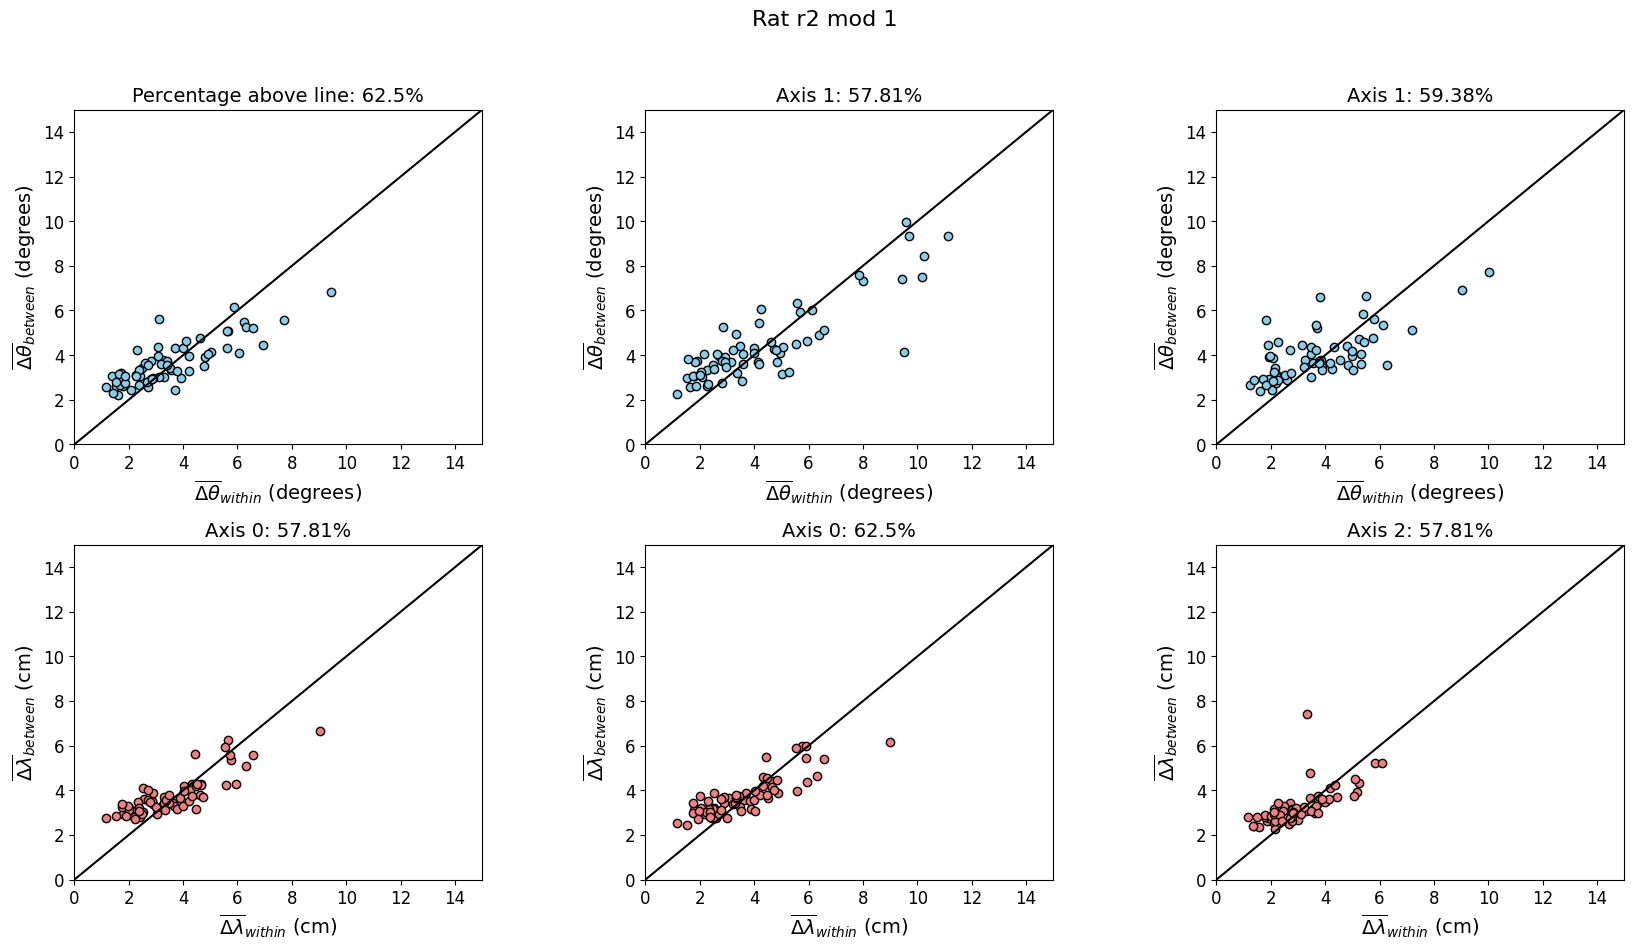

In [63]:
 # Create a figure with two subplots
axis_metrics = axis_metrics

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

orientation_lim = 15
spacing_lim = 15

# have more space between rows
fig.subplots_adjust(hspace = 0.3, wspace = 0.4)

plt.suptitle('Rat ' +  rat + ' mod ' + mod , fontsize = 16)

## For the mean
# delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_differences(cell_trial_dict)
# orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
# spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)
## Axis 0

delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 0)
orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)

# plot scatter plot of orientation
axes[0, 0].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
axes[0, 0].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
axes[0, 0].set_xlim(0, orientation_lim)
axes[0, 0].set_ylim(0, orientation_lim)
# plot a diagonal line
axes[0, 0].plot([0, orientation_lim], [0, orientation_lim], color='black')
axes[0, 0].set_title('Percentage above line: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
axes[0, 0].xaxis.label.set_size(14)
axes[0, 0].yaxis.label.set_size(14)

# plot scatter plot of spacing
axes[1, 0].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
axes[1, 0].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
axes[1, 0].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
axes[1, 0].set_xlim(0, spacing_lim)
axes[1, 0].set_ylim(0, spacing_lim)
# plot a diagonal line
axes[1, 0].plot([0, spacing_lim], [0, spacing_lim], color='black')
axes[1, 0].set_title('Axis 0: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
axes[1, 0].xaxis.label.set_size(14)
axes[1, 0].yaxis.label.set_size(14)

## For axis 1
delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 1)
orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)

# plot scatter plot of orientation
axes[0, 1].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
axes[0, 1].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
axes[0, 1].set_xlim(0, orientation_lim)
axes[0, 1].set_ylim(0, orientation_lim)
# plot a diagonal line
axes[0, 1].plot([0, orientation_lim], [0, orientation_lim], color='black')
axes[0, 1].set_title('Axis 1: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
axes[0, 1].xaxis.label.set_size(14)
axes[0, 1].yaxis.label.set_size(14)

# plot scatter plot of spacing
axes[1, 1].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
axes[1, 1].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
axes[1, 1].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
axes[1, 1].set_xlim(0, spacing_lim)
axes[1, 1].set_ylim(0, spacing_lim)
# plot a diagonal line
axes[1, 1].plot([0, spacing_lim], [0, spacing_lim], color='black')
axes[1, 1].set_title('Axis 0: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
axes[1, 1].xaxis.label.set_size(14)
axes[1, 1].yaxis.label.set_size(14)

## For axis 2
delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 2)
orientation_above = np.sum(delta_orientation_between_mean > delta_orientation_within_mean)/ len(delta_orientation_within_mean)
spacing_above = np.sum(delta_spacing_between_mean > delta_spacing_within_mean)/ len(delta_spacing_within_mean)

# plot scatter plot of orientation
axes[0, 2].scatter(delta_orientation_within_mean, delta_orientation_between_mean, color='skyblue', edgecolor='black')
axes[0, 2].set_xlabel(r'$\overline{\Delta\theta}_{within}$ (degrees)')
axes[0, 2].set_ylabel(r'$\overline{\Delta\theta}_{between}$ (degrees)')
axes[0, 2].set_xlim(0, orientation_lim)
axes[0, 2].set_ylim(0, orientation_lim)
# plot a diagonal line
axes[0, 2].plot([0, orientation_lim], [0, orientation_lim], color='black')
axes[0, 2].set_title('Axis 1: ' + str(round(orientation_above*100, 2)) + '%', fontsize = 14)
axes[0, 2].tick_params(axis='both', which='major', labelsize=12)
axes[0, 2].xaxis.label.set_size(14)
axes[0, 2].yaxis.label.set_size(14)

# plot scatter plot of spacing
axes[1, 2].scatter(delta_spacing_within_mean, delta_spacing_between_mean, color='lightcoral', edgecolor='black')
axes[1, 2].set_xlabel(r'$\overline{\Delta\lambda}_{within}$ (cm)')
axes[1, 2].set_ylabel(r'$\overline{\Delta\lambda}_{between}$ (cm)')
axes[1, 2].set_xlim(0, spacing_lim)
axes[1, 2].set_ylim(0, spacing_lim)
# plot a diagonal line
axes[1, 2].plot([0, spacing_lim], [0, spacing_lim], color='black')
axes[1, 2].set_title('Axis 2: ' + str(round(spacing_above*100, 2)) + '%', fontsize = 14)
axes[1, 2].tick_params(axis='both', which='major', labelsize=12)
axes[1, 2].xaxis.label.set_size(14)
axes[1, 2].yaxis.label.set_size(14)

plt.savefig(fig_directory + '/' + rat + mod + 'scatter_plot_differences_100bins.png', dpi = 1200)
plt.savefig(fig_directory +  '/' + rat + mod + 'scatter_plot_differences_100bins.svg', dpi = 1200)

In [87]:
# compute wilcoxon test for orientation
from scipy.stats import wilcoxon

delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 0)


res  = wilcoxon(delta_orientation_within_mean, delta_orientation_between_mean, method = 'approx')
print(res)
# 
# print('Orientation, axis 0')
# print('Statistic: ', statistic)
# print('P-value: ', pvalue)

# compute wilcoxon test for spacing
statistic, pvalue = wilcoxon(delta_spacing_within_mean, delta_spacing_between_mean)

print('Spacing, axis 0')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 1)

# statistic, pvalue = wilcoxon(delta_orientation_within_mean, delta_orientation_between_mean)
# 
# print('Orientation, axis 1')
# print('Statistic: ', statistic)
# print('P-value: ', pvalue)

# compute wilcoxon test for spacing
statistic, pvalue = wilcoxon(delta_spacing_within_mean, delta_spacing_between_mean)

print('Spacing, axis 1')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

delta_orientation_within_mean, delta_orientation_between_mean, delta_spacing_within_mean, delta_spacing_between_mean = get_delta_mean_axis_differences(axis_metrics, axis = 2)

statistic, pvalue = wilcoxon(delta_orientation_within_mean, delta_orientation_between_mean)

# print('Orientation, axis 2')
# print('Statistic: ', statistic)
# print('P-value: ', pvalue)

# compute wilcoxon test for spacing
statistic, pvalue = wilcoxon(delta_spacing_within_mean, delta_spacing_between_mean)
print('Spacing, axis 2')
print('Statistic: ', statistic)
print('P-value: ', pvalue)

WilcoxonResult(statistic=780.0, pvalue=7.392037848275985e-06)
Spacing, axis 0
Statistic:  202.0
P-value:  1.6670966057330441e-12
Spacing, axis 1
Statistic:  190.0
P-value:  1.132639794761879e-12
Spacing, axis 2
Statistic:  23.0
P-value:  3.8991854985847285e-15
